In [1]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [2]:
#data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("mocap",False)
data, train_slice, valid_slice, test_slice, scaler, pred_lens, data1=load_forecast_csv("kishimoto",False)

data
(33880, 4)
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       33870, 33871, 33872, 33873, 33874, 33875, 33876, 33877, 33878, 33879],
      dtype='int64', name='date', length=33880)
(33880, 4)
data
(33880, 4)
slice(None, 20328, None)
slice(20328, 27104, None)
slice(27104, None, None)
(1, 33880, 4)


/Users/katoutsubasa/ts2vec/datautils.py:140: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(f'datasets/{name}.csv', index_col='date', parse_dates=True)


In [3]:
data.shape

(1, 33880, 4)

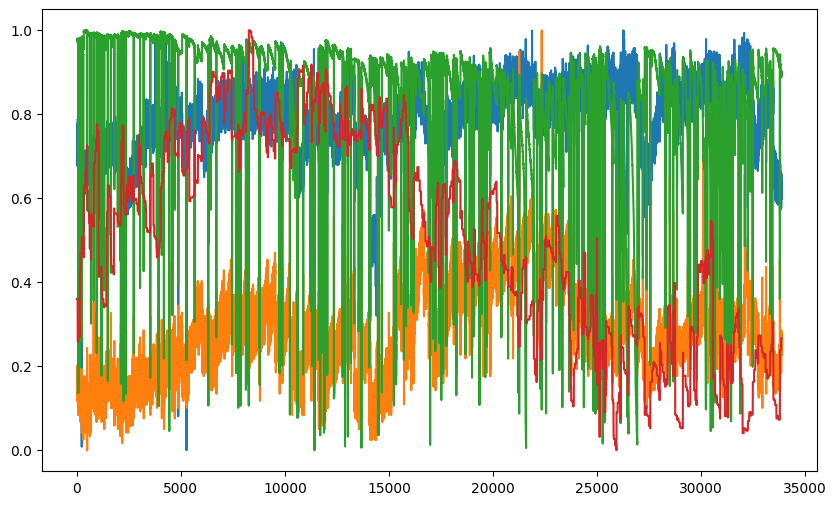

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [5]:
data.shape[1]

33880

In [6]:
!pip install tensorflow

In [7]:
import random
import numpy as np
import torch

def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    #torch.use_deterministic_algorithms = True


torch_fix_seed()

In [8]:
data[:,:1000,:].shape

(1, 1000, 4)

In [9]:
data.shape

(1, 33880, 4)

In [10]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data.shape[-1],
    length_dim=1000,
    device="cpu",
    output_dims=320,
    input_total=1,
    max_train_length=1200,
    #output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True,
    n_iters=120,
    save_model="no_pros_k5_10.pth"
)
# from ts2vec import TS2Vec
# model = TS2Vec(
#     input_dims=data.shape[-1],
#     device="cpu",
#     output_dims=320,
#     input_total=1,
#     #output_dims=10
# )
# loss_log = model.fit(
#     data[:,:1000,:],
#     verbose=True,
#     n_iters=600,
#     save_model="no_pros_k5_10.pth"
# )

loss
tensor(2087.9570, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(1134.7788) tensor(993.9963)
Best model updated: loss=4642.4873046875
Epoch #0: loss=4642.4873046875
loss
tensor(392.0851, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(839.9567) tensor(798.3067)
Best model updated: loss=2358.00146484375
Epoch #1: loss=2358.00146484375
loss
tensor(104.0605, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(362.0053) tensor(148.7795)
Best model updated: loss=717.0022583007812
Epoch #2: loss=717.0022583007812
loss
tensor(302.4222, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(1828.7321) tensor(1058.7941)
Epoch #3: loss=3767.45361328125
loss
tensor(301.5426, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(427.7051) tensor(321.2143)
Epoch #4: loss=1200.2459716796875
loss
tensor(75.4153, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(420.2708) tensor(334.2303)
Epoch #5: loss=980.8165893554688
loss
tensor(259.4217, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(266.3573) tensor(221.9776)
Epoc

In [11]:
model.load('no_pros_k5_10.pth')

In [11]:
all_repr = model.encode(
        data,
        causal=False,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

a


In [ ]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-0.03075235 -0.06792361 -0.0289534  ... -0.00732096 -0.01717962
   -0.00357732]
  [-0.00761766 -0.07694451 -0.01543203 ... -0.00464515 -0.01389094
   -0.00408438]
  [-0.028163   -0.07393141 -0.04156554 ...  0.00550285 -0.01673326
   -0.00321413]
  ...
  [ 0.10780403  0.07769969 -0.19368306 ...  0.03131656  0.11678715
   -0.04212169]
  [ 0.10042492  0.0712672  -0.14410761 ...  0.0307751   0.09494737
   -0.04398032]
  [ 0.06519779  0.05590393 -0.12382036 ...  0.00661098  0.06229579
   -0.03739668]]]


In [12]:
all_repr.shape

(1, 33880, 320)

In [ ]:
test_repr.shape

(1, 1471, 320)

In [13]:
test_2d = all_repr.reshape(33880, 320)
#test_2d=test_2d[:1000]

In [ ]:
from sklearn.cluster import DBSCAN

In [14]:
import numpy as np
data_test=data1

In [15]:
data_test.shape
date=data_test.index
date_list=date.tolist()

In [16]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=3)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_12215/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


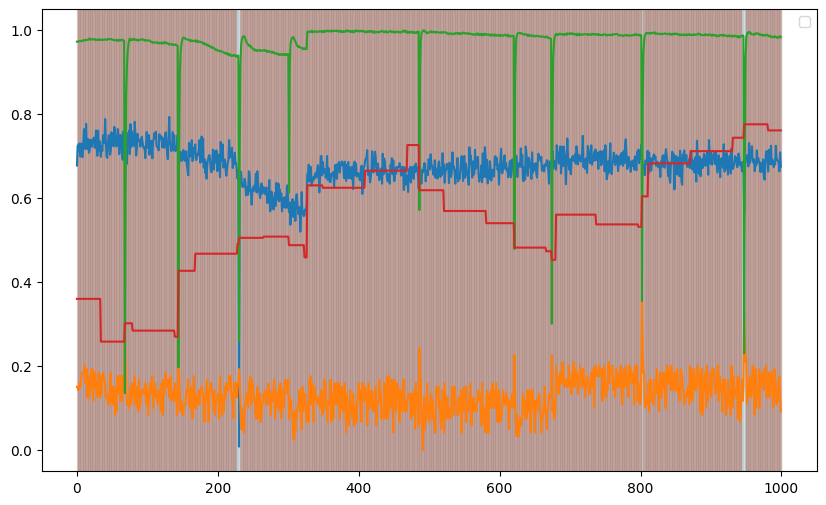

In [17]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [24]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を6としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_
print(set(labels))

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0, 1, 2}


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_12215/425555425.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


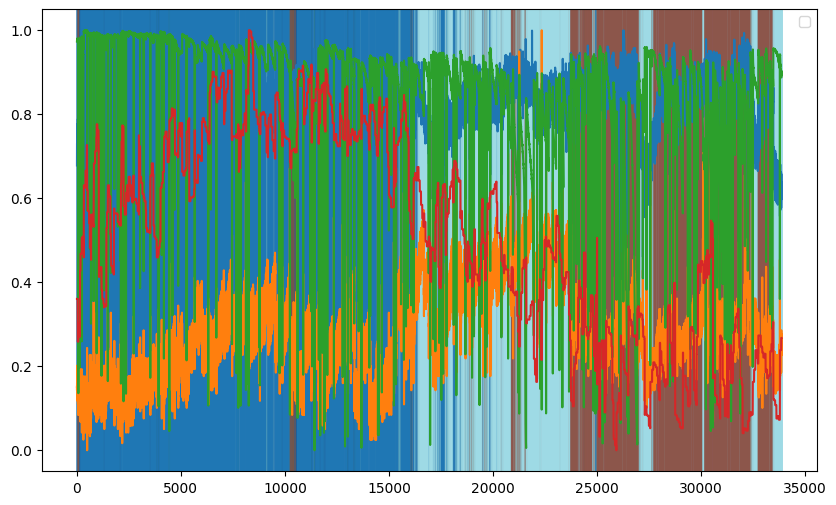

In [26]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
#for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_7766/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


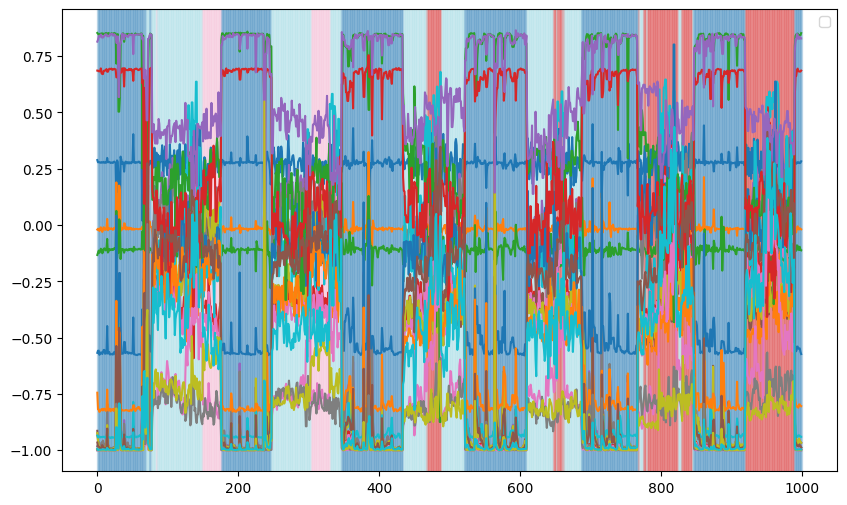

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [ ]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_7766/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


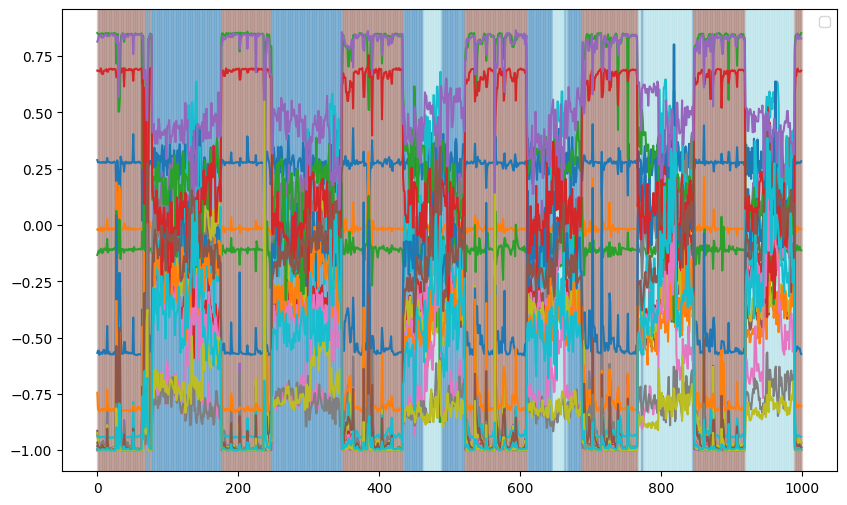

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

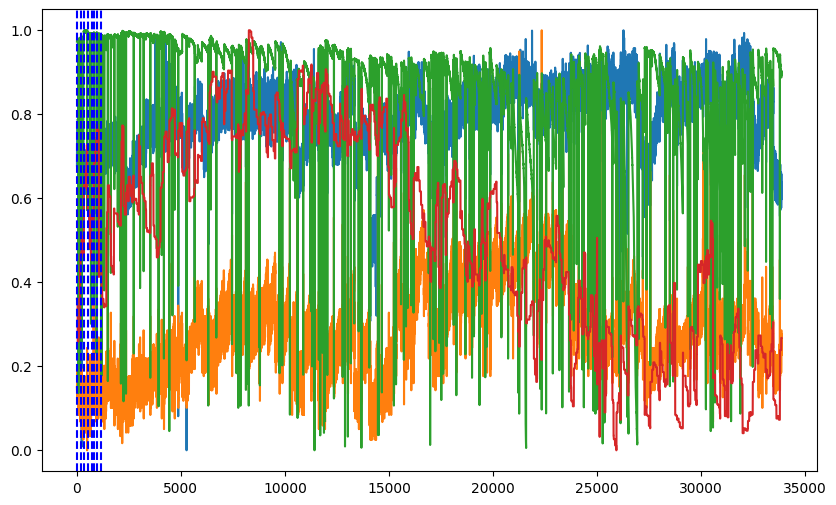

In [20]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='b', linestyle='--')
plt.axvline(x=200, color='b', linestyle='--')
plt.axvline(x=350, color='b', linestyle='--')
plt.axvline(x=530, color='b', linestyle='--')
plt.axvline(x=700, color='b', linestyle='--')
plt.axvline(x=835, color='b', linestyle='--')
plt.axvline(x=970, color='b', linestyle='--')
plt.axvline(x=1145, color='b', linestyle='--')

41


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_12215/203972373.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


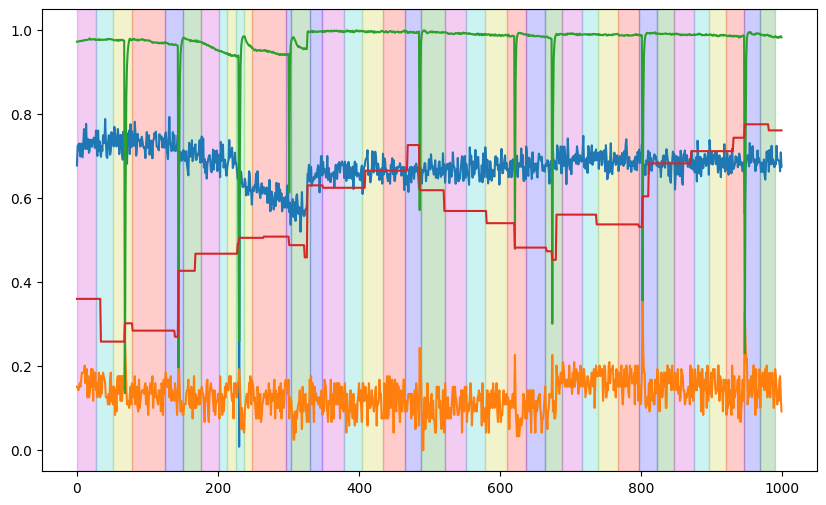

In [21]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,27, 51, 78, 125, 150, 176, 202, 213, 225, 237, 248, 296, 303, 330, 347, 378, 404, 434, 465, 488, 522, 552, 578, 610, 637, 663, 688, 716, 739, 767, 797, 822, 847, 875, 896, 920, 946, 968, 990]
num=[5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 4.0, 6.0, 1.0, 3.0, 2.0, 3.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0,]
#colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
colors=[]
print(len(regime_list)+1)
for i in range(len(regime_list)+1):
    if num[i]==1:
        colors.append("r")
    elif num[i]==2:
        colors.append("g")
    elif num[i]==3:
        colors.append("b")
    elif num[i]==4:
        colors.append("c")
    elif num[i]==5:
        colors.append("m")
    elif num[i]==6:
        colors.append("y")
    else:
        colors.append("k")
plt.plot(data_test_copy[:1000]) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [22]:
from sklearn.manifold import TSNE
regime_list=[0,27, 51, 78, 125, 150, 176, 202, 213, 225, 237, 248, 296, 303, 330, 347, 378, 404, 434, 465, 488, 522, 552, 578, 610, 637, 663, 688, 716, 739, 767, 797, 822, 847, 875, 896, 920, 946, 968, 990]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

In [23]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
#regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
#colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        #label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
# from sklearn.manifold import TSNE
# regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 15000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


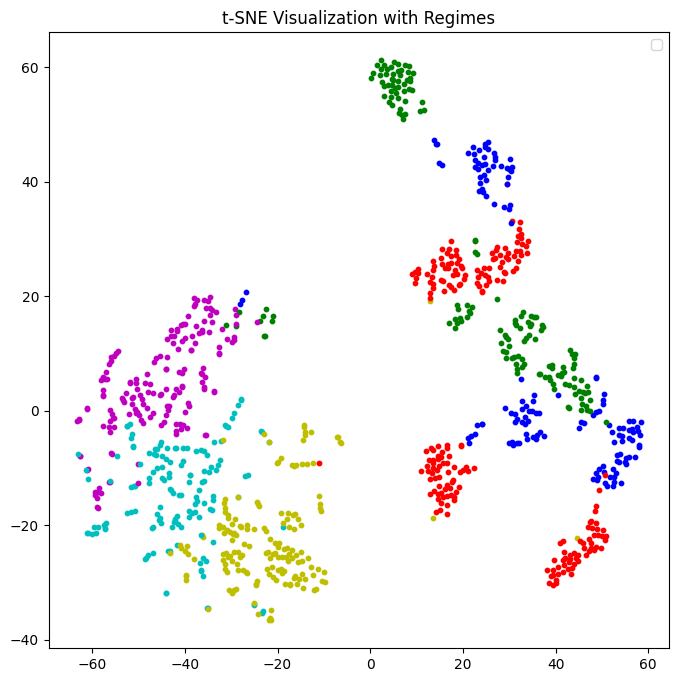

In [ ]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
# regime_label=[0,1,2,3,4,1,2,3,4,5]

# # 各regimeごとに色を指定
# colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        #label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()